In [49]:
import pandas as pd
import numpy as np
from icecream import ic
import seaborn as sns

In [50]:
df = pd.read_csv('penguins_size.csv')
df

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


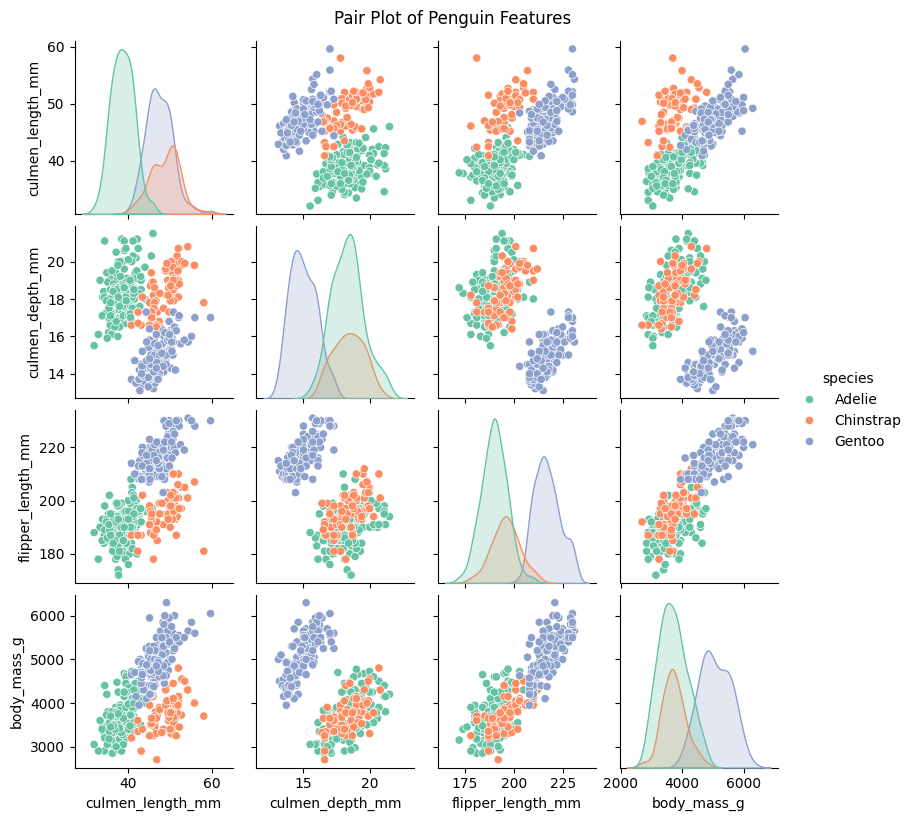

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

columns = ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g', 'species']

df_clean = df[columns].dropna()

sns.pairplot(df_clean, hue='species', palette='Set2', diag_kind='kde', height=2)
plt.suptitle('Pair Plot of Penguin Features', y=1.02)
plt.show()


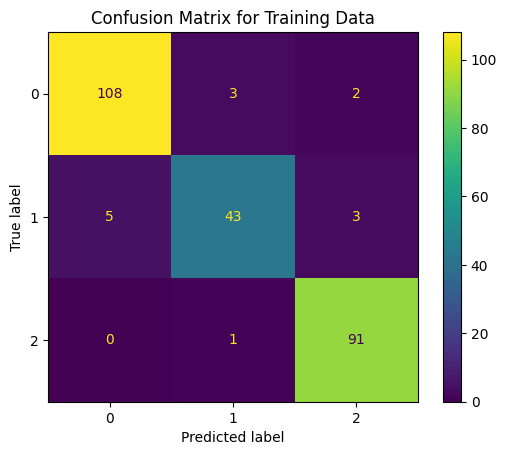

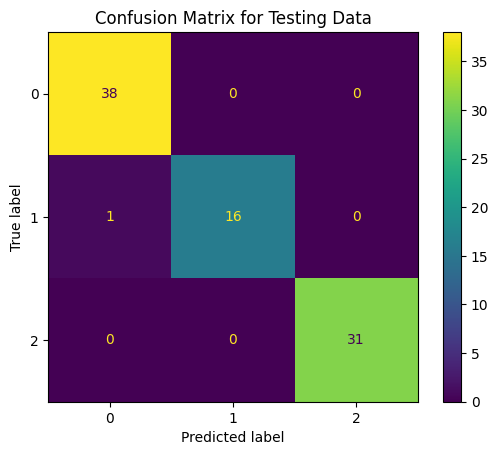

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

X = df_clean[['culmen_length_mm', 'flipper_length_mm']]
y = df_clean['species']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svc', SVC())
])

pipeline.fit(X_train, y_train)

y_train_pred = pipeline.predict(X_train)
y_test_pred = pipeline.predict(X_test)

train_accuracy = accuracy_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred, average='macro')
train_confusion = confusion_matrix(y_train, y_train_pred)

test_accuracy = accuracy_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred, average='macro')
test_confusion = confusion_matrix(y_test, y_test_pred)



cm_train = ConfusionMatrixDisplay(confusion_matrix = train_confusion)
cm_train.plot()
plt.title('Confusion Matrix for Training Data')
plt.show()


cm_test = ConfusionMatrixDisplay(confusion_matrix = test_confusion)
cm_test.plot()
plt.title('Confusion Matrix for Testing Data')
plt.show()

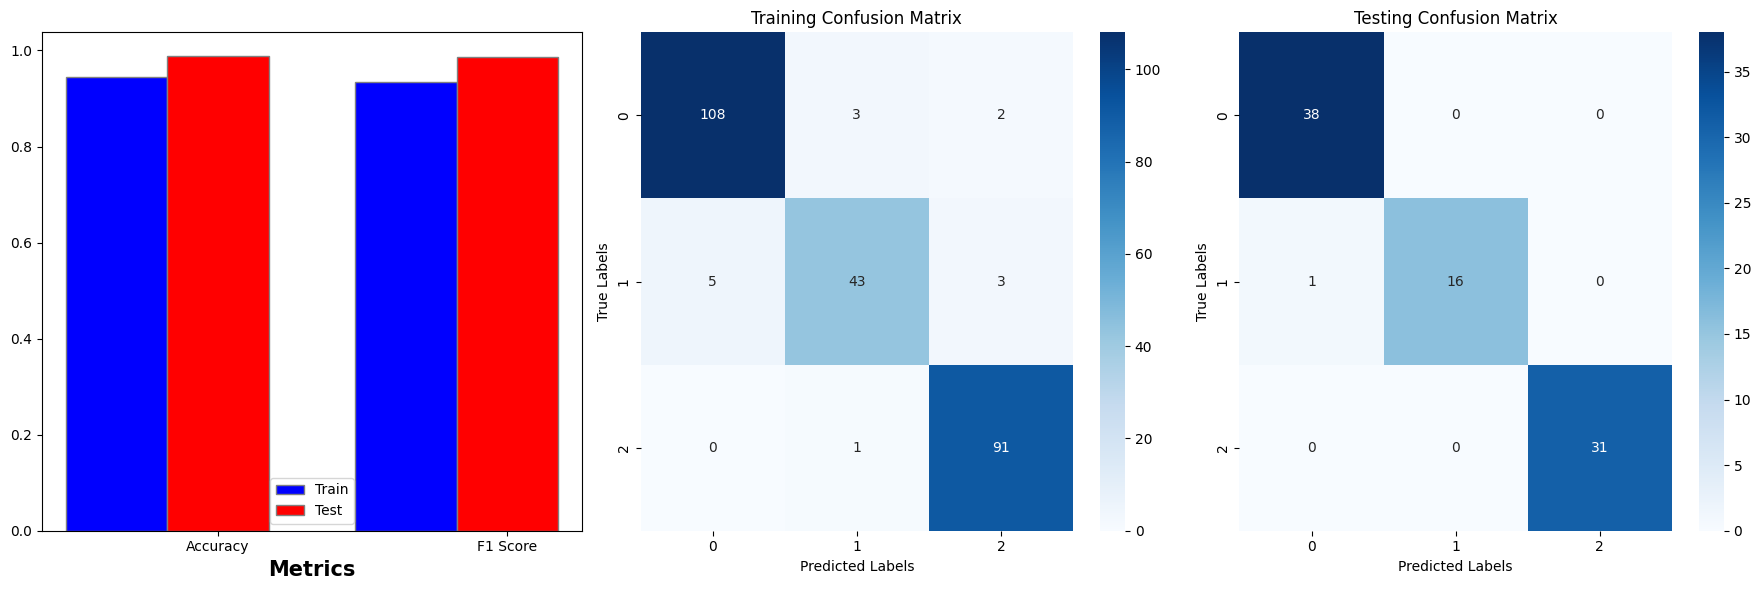

In [56]:
# Assuming you've already imported necessary libraries and computed the metrics
import matplotlib.pyplot as plt
import seaborn as sns

# Setting up the figure and axes
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Bar Plot for Accuracy and F1 scores
metrics = ['Accuracy', 'F1 Score']
values_train = [train_accuracy, train_f1]
values_test = [test_accuracy, test_f1]

bar_width = 0.35
r1 = range(len(metrics))
r2 = [x + bar_width for x in r1]

axs[0].bar(r1, values_train, color='b', width=bar_width, edgecolor='grey', label='Train')
axs[0].bar(r2, values_test, color='r', width=bar_width, edgecolor='grey', label='Test')
axs[0].set_xlabel('Metrics', fontweight='bold', fontsize=15)
axs[0].set_xticks([r + bar_width for r in range(len(metrics))])
axs[0].set_xticklabels(metrics)
axs[0].legend()

# Heatmap for Training Confusion Matrix
sns.heatmap(train_confusion, annot=True, fmt='g', cmap='Blues', ax=axs[1])
axs[1].set_title('Training Confusion Matrix')
axs[1].set_xlabel('Predicted Labels')
axs[1].set_ylabel('True Labels')

# Heatmap for Testing Confusion Matrix
sns.heatmap(test_confusion, annot=True, fmt='g', cmap='Blues', ax=axs[2])
axs[2].set_title('Testing Confusion Matrix')
axs[2].set_xlabel('Predicted Labels')
axs[2].set_ylabel('True Labels')

# Displaying the plot
plt.tight_layout()
plt.show()


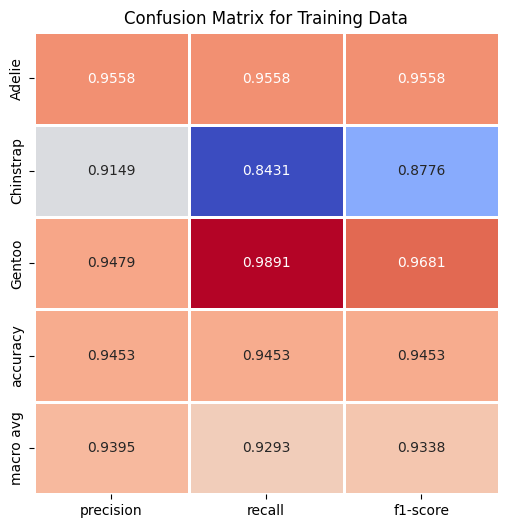

In [53]:
report = classification_report(y_train, y_train_pred, output_dict=True)
df = pd.DataFrame(report).transpose()

plt.figure(figsize=(6, 6))
sns.heatmap(df.iloc[:-1, :-1], annot=True, cmap='coolwarm', fmt='.4f', linecolor='white', linewidths=1, cbar=False)
plt.title('Confusion Matrix for Training Data')
plt.show()